---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

- Estudiante: **Adrián Avilés Flores**
- Carné: **B80835**
- Grupo: **2**

- Estudiante: **Felipe Badilla Marchena**
- Carné: **B70848**
- Grupo: **1**

- Estudiante: **David Zamora Barboza**
- Carné: **B57980**
- Grupo: **1**

# `P5` - *Procesos M/M/s*

> El caso especial de los procesos aleatorios donde existen "estados" y "transiciones" entre estos estados, las cadenas de Markov modelan las probabilidades de transición y el tiempo de permanencia entre cada estado. En particular, la teoría de colas describe la evolución del número de elementos en la fila, dado un flujo de entrada y un flujo de salida.

---
## Asignaciones

Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 100 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 7$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.

#### Determinación teórica del número s de servidores

Apoyándose en la teoría para sistemas M/M/s se puede determinar la siguiente probabilidad:

$$
P( \text{101 o más clientes en el sistema} ) = \sum_{i=101}^{\infty} (1 - \rho) \rho^i
$$

$$
= 1 - \sum_{i=0}^{100} (1 - \rho) \rho^{i} = 1 - [(1 - \rho) (1 + \rho + \rho^2 + ... + \rho^{100})]
$$

$$
= 1 - (1 - \rho^{101}) = \rho^{101}
$$

Ahora, por definición se sabe que $\rho = \frac{\lambda}{s\nu}$ y puesto que se requiere una probabilidad $\leq 5\%$:

$$
P( \text{101 o más clientes en el sistema} ) = \rho^{101} \leq 0.05 \Rightarrow \left( \frac{\lambda}{s\nu} \right) ^{101} \leq 0.05
$$

$$
\Rightarrow \left( \frac{7}{0.25 s} \right) ^{101} \leq 0.05 \Rightarrow \left( \frac{28}{s} \right) ^{101} \leq 0.05
$$

$$
\Rightarrow \frac{28^{101}}{0.05} \leq s^{101} \Rightarrow \left( \frac{28^{101}}{0.05} \right) ^{\frac{1}{101}} \leq s
$$

$$
\Rightarrow s \geq 28.84
$$

De esta forma se puede notar que se ocupa un mínimo de 29 servidores para lograr una cola inferior a 101 personas el 95% del tiempo.
 
 ---
 
 #### Simulación para un sistema con 29 servidores

Simulación 1
Parámetro lambda = 7.0
Parámetro nu = 0.25
Tiempo con más de 98 solicitudes en fila:
	 90.78%
	 Sí cumple con la especificación.
Simulación es equivalente a 66.15 horas.


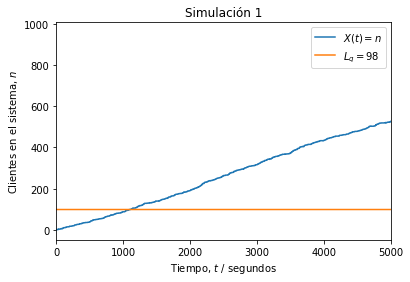

Simulación 2
Parámetro lambda = 7.0
Parámetro nu = 0.25
Tiempo con más de 98 solicitudes en fila:
	 89.54%
	 Sí cumple con la especificación.
Simulación es equivalente a 66.34 horas.


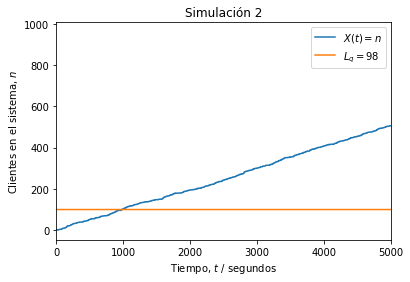

In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

def simul(numero):
    
    # Número de clientes
    N = 1000

    # Parámetro de llegada (clientes/segundos)
    lam = 7/60

    # Parámetro de servicio (servicios/segundos)
    nu = 0.25/60

    # Distribución de los tiempos de llegada entre cada cliente
    X = stats.expon(scale = 1/lam)

    # Distribución de los tiempos de servicio a cada cliente
    Y = stats.expon(scale = 1/nu)

    # Intervalos entre llegadas (segundos desde último cliente)
    t_intervalos = np.ceil(X.rvs(N)).astype('int')

    # Tiempos de las llegadas (segundos desde el inicio)
    t_llegadas = [t_intervalos[0]]
    for i in range(1, len(t_intervalos)):
        siguiente = t_llegadas[i-1] + t_intervalos[i]
        t_llegadas.append(siguiente)

    # Tiempos de servicio (segundos desde inicio de servicio)
    t_servicio = np.ceil(Y.rvs(N)).astype('int')

    # Inicialización del tiempo de inicio y fin de atención
    inicio = t_llegadas[0]          # primera llegada
    fin = inicio + t_servicio[0]    # primera salida

    # Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
    t_atencion = [inicio]
    for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

    # Inicialización del vector temporal para registrar eventos
    t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

    # Asignación de eventos de llegada (+1) y salida (-1) de clientes
    for c in range(N):
        i = t_llegadas[c]
        t[i] += 1
        j = t_atencion[c] + t_servicio[c]
        t[j] -= 1

    # Umbral de P o más personas en sistema (hay P - 1 en fila)
    P = 100

    # Instantes (segundos) de tiempo con P o más solicitudes en sistema
    exceso = 0

    # Proceso aleatorio (estados n = {0, 1, 2...})
    Xt = np.zeros(t.shape)

    # Inicialización de estado n
    n = 0

    # Recorrido del vector temporal y conteo de clientes (estado n)
    for i, c in enumerate(t):
        n += c # sumar (+1) o restar (-1) al estado
        Xt[i] = n
        if Xt[i] >= P: 
            exceso += 1

    # Fracción de tiempo con P o más solicitudes en sistema
    fraccion = exceso / len(t)

    # Resultados
    print('Simulación {}'.format(numero))
    print('Parámetro lambda =', str(lam*60))
    print('Parámetro nu =', str(nu*60))
    print('Tiempo con más de {} solicitudes en fila:'.format(P-2))
    print('\t {:0.2f}%'.format(100*fraccion))
    if fraccion <= 0.95:
        print('\t Sí cumple con la especificación.')
    else:
        print('\t No cumple con la especificación.') 
    print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

    # Gráfica de X(t) (estados del sistema)
    plt.figure()
    plt.plot(Xt)
    plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
    plt.legend(('$X(t) = n$', '$L_q = $' + str(P-2)))
    plt.ylabel('Clientes en el sistema, $n$')
    plt.xlabel('Tiempo, $t$ / segundos')
    plt.xlim((0, 5000))
    plt.title('Simulación {}'.format(numero))
    plt.show()

simul(1)
simul(2)

Con estas dos gráficas se puede observar que si el sistema presenta una cantidad de servidores igual o superior a 29, es posible no sobrepasar una cola de 100 personas durante el 95% del tiempo de servicio. Esto es posible puesto que, aunque la tasa de servicio de cada servidor es mucho menor a la tasa con que arriban las personas, se cuenta con los suficientes servidores para controlar el tamaño de la fila durante todo el tiempo de operación según los límites establecidos.

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---